<a href="https://colab.research.google.com/github/JigglyNoahPuff/Good2Go_Lanes/blob/main/streetviewAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the Automated Image Gathering Process!
## There are a few things to set up and then its all smooth sailing from there on.
#### 1. Connect your Google Drive so that it automatically saves and loads the data with minimal effort
The code is set to work if the files and folders are located at "content/drive/MyDrive/Good2GoLanes/StreetViewApi/". If you store it somewhere else you will need to update the paths

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 2. Import all the libraries needed and initialize the variables that are frequently reused.
*Note: You made need to ask Noah for the updated secret key*

In [ ]:
import requests as r
import json

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import pandas as pd
# Uncomment the following line when running for the first time
# !pip install geopandas
import geopandas as gpd

noahsSecretKey = '*******************************'

url = 'https://maps.googleapis.com/maps/api/streetview'

imagename1 = 'tempImg1.jpg'
imagename2 = 'tempImg2.jpg'

#### 3. Load in and convert the .geojson file to a pandas DataFrame
**Only Run this once!**  
It initializes the dataframe. You can rerun it if you made so bad  a mistake that you need to fully wipe the dataframe.

In [ ]:
fname = "./drive/MyDrive/Good2GoLanes/StreetViewApi/us_mt_missoula-addresses-county.geojson"
# read in geojson data
df = pd.DataFrame(gpd.read_file(fname))
# filter out addresses without house numbers
df = df[df.number != '']
# set value of city and state column
df['cityState'] = ' Missoula, MT'
# create a formatted address called address
df['address'] = df.apply(lambda row: str(row.number) + ' ' + str(row.street).title() + str(row.cityState), axis=1)
# set lanes to -1 intially so that addresses that have not been checked are -1 (which is impossible for lanes so -1 should obviously be not right)
df['lanes'] = None
# create filname column and set it to a initial value
df['filename1'] = 'img_000_.jpg'
df['filename2'] = 'img_000_.jpg'
# save to a csv for easy loading and saving
df.drop(['id', 'unit', 'city', 'district', 'region', 'postcode', 'hash'], axis=1, inplace=True)
df.drop_duplicates(inplace=True)
df.to_csv('./drive/MyDrive/Good2GoLanes/StreetViewApi/missoula_MT_addresses.csv', index=False)

# read the file back in and display its length and first five values to check that everything worked
addressDf = pd.read_csv('./drive/MyDrive/Good2GoLanes/StreetViewApi/missoula_MT_addresses.csv')
print(len(addressDf))
addressDf.head()

41484


,number,street,geometry,cityState,address,lanes,filename1,filename2
0,720,LUND DR,POINT (-113.9992722 46.6622307),"Missoula, MT","720 Lund Dr Missoula, MT",NaN,img_000_.jpg,img_000_.jpg
1,721,LUND DR,POINT (-114.0015706 46.6616179),"Missoula, MT","721 Lund Dr Missoula, MT",NaN,img_000_.jpg,img_000_.jpg
2,1016,LUND DR,POINT (-113.9908789 46.6626383),"Missoula, MT","1016 Lund Dr Missoula, MT",NaN,img_000_.jpg,img_000_.jpg
3,828,LUND DR,POINT (-113.9993853 46.6633573),"Missoula, MT","828 Lund Dr Missoula, MT",NaN,img_000_.jpg,img_000_.jpg
4,5180,CHIEF LOOKING GLASS RD,POINT (-114.065164 46.6611618),"Missoula, MT","5180 Chief Looking Glass Rd Missoula, MT",NaN,img_000_.jpg,img_000_.jpg


Spice number could not be automatically detected.  This usually happens when running for the first time.
This is the number that the last photo had.
If your last image was named img_0069.jpg, then you would enter 69.

So what spice number did you leave off on?
0
720 Lund Dr Missoula, MT
721 Lund Dr Missoula, MT
1016 Lund Dr Missoula, MT
828 Lund Dr Missoula, MT
5180 Chief Looking Glass Rd Missoula, MT


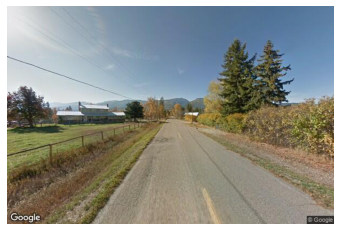

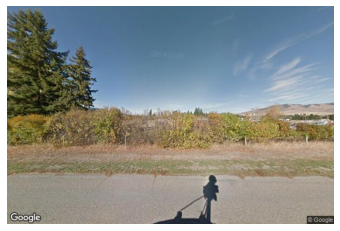

Top(1) or Bottom(2)?
1
How many lanes?
2
4450 Chief Looking Glass Rd Missoula, MT


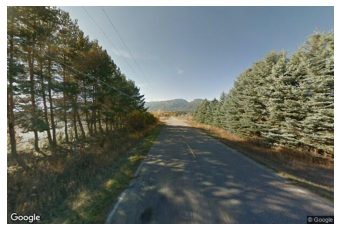

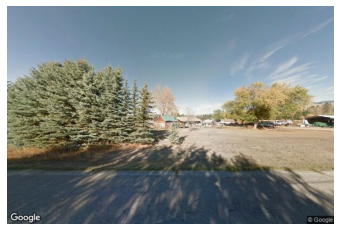

Top(1) or Bottom(2)?
1
How many lanes?
2
5204 Custer Ln Missoula, MT


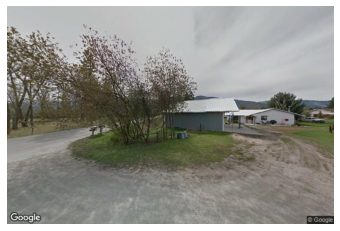

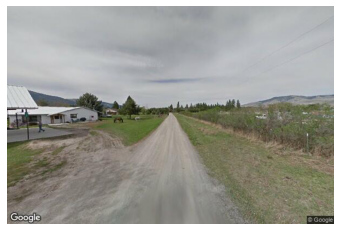

Top(1) or Bottom(2)?
2
How many lanes?
1
21826 Kesa Ln Missoula, MT
5206 Chief Looking Glass Rd Missoula, MT


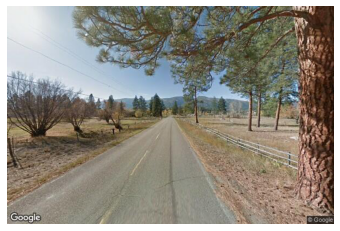

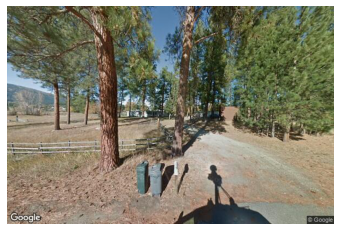

Top(1) or Bottom(2)?
1
How many lanes?
2
21795 Polette Pl Missoula, MT


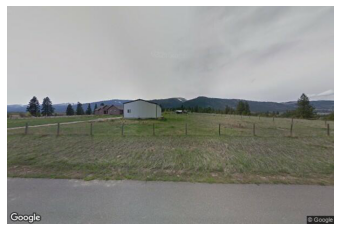

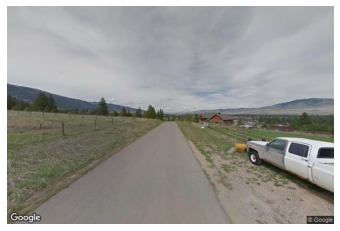

Top(1) or Bottom(2)?
2
How many lanes?
1
21900 Jones Rd Missoula, MT
5202 Custer Ln Missoula, MT
21580 Lower Woodchuck Rd Missoula, MT
21600 Lower Woodchuck Rd Missoula, MT
4270 Chief Looking Glass Rd Missoula, MT


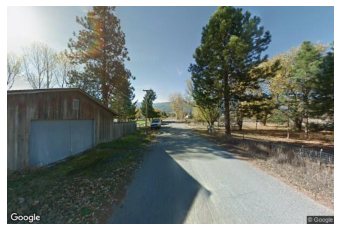

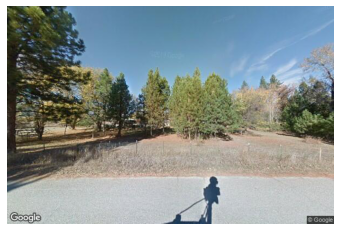

Top(1) or Bottom(2)?
1
How many lanes?
1
21768 Five Wound Way Missoula, MT
21715 Lower Woodchuck Rd Missoula, MT
21749 Five Wound Way Missoula, MT
21718 Kesa Ln Missoula, MT
21583 Lower Woodchuck Rd Missoula, MT
6205 Rockrose Ln Missoula, MT
21732 Polette Pl Missoula, MT


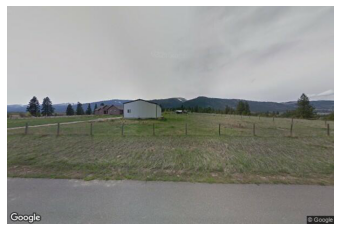

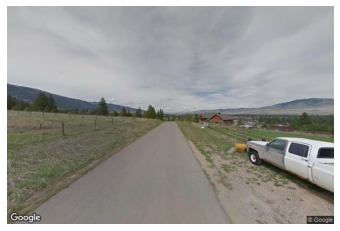

Top(1) or Bottom(2)?
2
How many lanes?
1
6283 Rockrose Ln Missoula, MT
5201 Custer Ln Missoula, MT
21800 Jones Rd Missoula, MT
21771 Polette Pl Missoula, MT


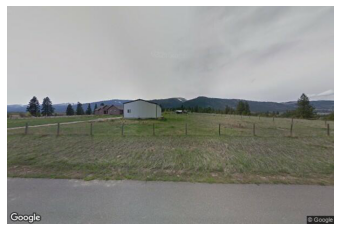

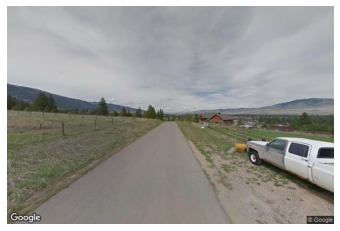

Top(1) or Bottom(2)?
2
How many lanes?
1
5203 Custer Ln Missoula, MT
5700 County Line Rd Missoula, MT


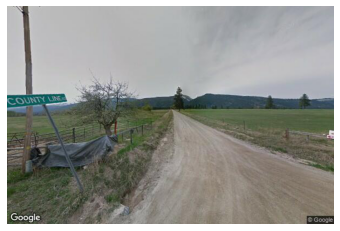

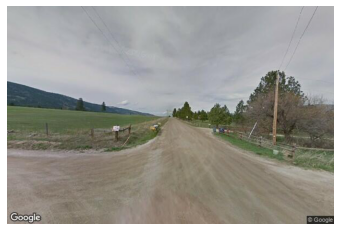

Top(1) or Bottom(2)?
1
How many lanes?
0
5382 Two Moons Rd Missoula, MT
5402 Two Moons Rd Missoula, MT
4228 Chief Looking Glass Rd Missoula, MT
21660 Five Wound Way Missoula, MT
21655 Five Wounds Way Missoula, MT
6300 Rockrose Ln Missoula, MT
21600 Kesa Ln Missoula, MT
6400 Rockrose Ln Missoula, MT
6500 Rockrose Ln Missoula, MT
5200 Custer Ln Missoula, MT
21420 Old Highway 93 S Missoula, MT


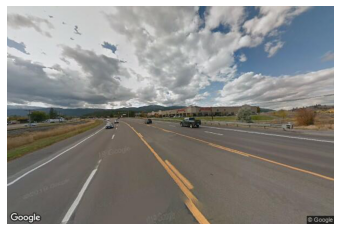

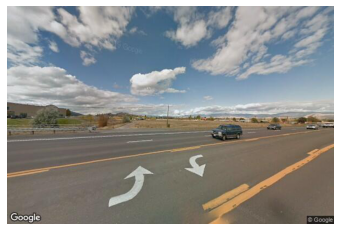

Top(1) or Bottom(2)?
1
How many lanes?
5
21620 Polette Pl Missoula, MT


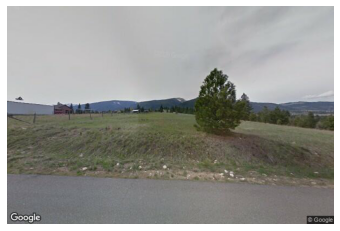

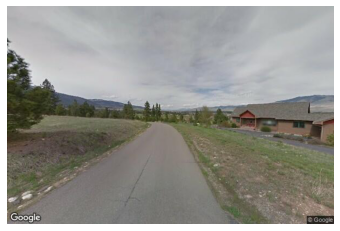

Top(1) or Bottom(2)?
2
How many lanes?
1
5380 Two Moons Rd Missoula, MT
5400 Two Moons Rd Missoula, MT
21400 Old Highway 93 S Missoula, MT


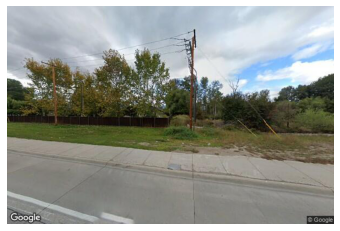

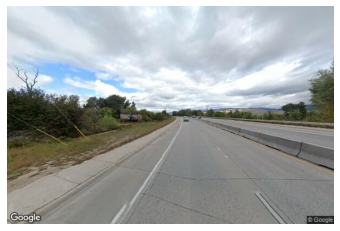

Top(1) or Bottom(2)?
2
How many lanes?
2
21410 Five Wound Way Missoula, MT
21477 Five Wound Way Missoula, MT
21462 Polette Pl Missoula, MT


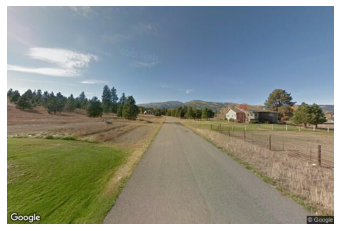

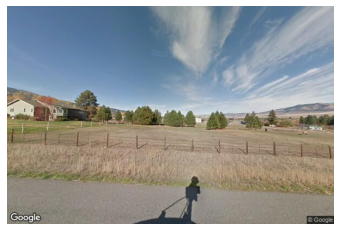

Top(1) or Bottom(2)?
1
How many lanes?
1
21537 Polette Pl Missoula, MT


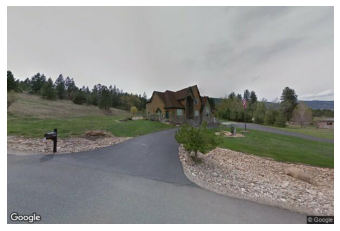

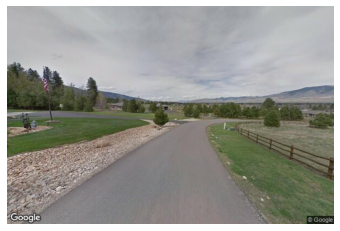

Top(1) or Bottom(2)?
q
How many lanes?
q


In [ ]:
# kanye is both our variable for choosing the top image or bottom and our variable for ending the loop
# it is set to 'y' so that the loop starts when we get there
kanye = 'y'

# read in the dataframe with all the addresses
addressDf = pd.read_csv('./drive/MyDrive/Good2GoLanes/StreetViewApi/missoula_MT_addresses.csv')
# get the last row with lanes data that is not None else return that we are at the first row
rowNum = addressDf.lanes.last_valid_index() + 1 if addressDf.lanes.last_valid_index() is not None else 0
# get the spice number from whatever the last image number, such as (0069), that was used.  Throws an error if the last row was 0
try: spiceNum = int(addressDf.filename2.loc[rowNum - 1][10:14]) + 1
# if an error is thrown ask the user for the last spice number
except: 
  print('Spice number could not be automatically detected.  This usually happens when running for the first time.')
  print('This is the number that the last photo had.')
  print('If your last image was named img_0069.jpg, then you would enter 69.\n')
  spiceNum = int(input('So what spice number did you leave off on?\n')) + 1
  
# start the loop!
while kanye != 'q':
  # get the next address from the DataFrame
  where = addressDf.address.loc[rowNum]
  # Display the address for error checking purposes
  print(where)
  # initialize all the parameters for the get request
  # only the first set of parameters needs to return an error code because the address is the same for all of them
  p1 = {'key':noahsSecretKey, 'location':where, 'size':'600x400', 'fov':'120', 'heading':'270', 'return_error_code':'true'} # west
  p2 = {'key':noahsSecretKey, 'location':where, 'size':'600x400', 'fov':'120', 'heading':'0'} # north
  p3 = {'key':noahsSecretKey, 'location':where, 'size':'600x400', 'fov':'120', 'heading':'90'} # east
  p4 = {'key':noahsSecretKey, 'location':where, 'size':'600x400', 'fov':'120', 'heading':'180'} # south

  # make the first get request and save its response
  response1 = r.get(url, params=p1, stream=True)

  # check if its response code is 200 also know as OK
  # google will throw an error 404 if the address does not have an image
  # if that is the case set the filenames to None, the lanes to 0, and continue on to the next address
  if response1.status_code != 200:
    addressDf.at[rowNum, 'filename1'] = None
    addressDf.at[rowNum, 'filename2'] = None
    addressDf.at[rowNum, 'lanes'] = 0
    rowNum += 1
    continue

  # if we are here that means the status code was 200 which means this should also all be 200
  response2 = r.get(url, params=p2, stream=True)

  # save both images to temporary files so we can show them to the user
  with open(imagename1, 'wb') as f:
          f.write(response1.content)
  with open(imagename2, 'wb') as f:
          f.write(response2.content)

  # show both images to the user so they can pick first or second
  try:
    img = mpimg.imread(imagename1)
    imgplot = plt.imshow(img)
    plt.axis("off")
    plt.show()
  except:
    print(response1.text)
  try:
    img = mpimg.imread(imagename2)
    imgplot = plt.imshow(img)
    plt.axis("off")
    plt.show()
  except:
    print(response2.text)

  # ask user first or second? and how many lanes?
  kanye = str(input('Top(1) or Bottom(2)?\n'))
  lanes = str(input('How many lanes?\n'))
  
  # check if its first and the lanes are not 0
  if kanye in ['t', 'top', 'T', 'Top', 'TOP', '1']  and lanes != '0':
      # save the first image to the corresponding folder in our drive
      with open(f'./drive/MyDrive/Good2GoLanes/StreetViewApi/{lanes}/noah_img_{f"{spiceNum}".zfill(4)}.jpg', 'wb') as f:
            f.write(response1.content)
      # save the "third" image to the corresponding folder in our drive
      with open(f'./drive/MyDrive/Good2GoLanes/StreetViewApi/{lanes}/noah_img_{f"{spiceNum + 1}".zfill(4)}.jpg', 'wb') as f:
            # get the image from the heading opposite the first image
            response3 = r.get(url, params=p3, stream=True)
            f.write(response3.content)
      # update the DataFrame with the information supplied from the user   
      addressDf.at[rowNum, 'filename1'] = '/noah_img_' + f'{spiceNum}'.zfill(4) + '.jpg'
      addressDf.at[rowNum, 'filename2'] = '/noah_img_' + f'{spiceNum + 1}'.zfill(4) + '.jpg'
      # this is wrapped in a try except cause sometimes it throws up errors... not quite sure why
      try: addressDf.at[rowNum, 'lanes'] = lanes
      except: pass
      # this is the number used to name the images we saved two images so increment it by 2
      spiceNum += 2
  # check if its not first and the lanes are not 0 and kanye doesnt want to quit
  elif kanye != 'q' and lanes != '0':
      # save the second image to the corresponding folder in our drive
      with open(f'./drive/MyDrive/Good2GoLanes/StreetViewApi/{lanes}/noah_img_{f"{spiceNum}".zfill(4)}.jpg', 'wb') as f:
          f.write(response2.content)
      # save the "fourth" image to the corresponding folder in our drive
      with open(f'./drive/MyDrive/Good2GoLanes/StreetViewApi/{lanes}/noah_img_{f"{spiceNum + 1}".zfill(4)}.jpg', 'wb') as f:
          # get the image from the heading opposite the second image
          response4 = r.get(url, params=p4, stream=True)
          f.write(response4.content)
      # update the DataFrame with the information supplied from the user 
      addressDf.at[rowNum, 'filename1'] = '/noah_img_' + f'{spiceNum}'.zfill(4) + '.jpg'
      addressDf.at[rowNum, 'filename2'] = '/noah_img_' + f'{spiceNum + 1}'.zfill(4) + '.jpg'
      # this is wrapped in a try except cause sometimes it throws up errors... not quite sure why
      try: addressDf.at[rowNum, 'lanes'] = lanes
      except: pass
      # this is the number used to name the images we saved two images so increment it by 2
      spiceNum += 2

  # go to the next row of the dataframe
  rowNum += 1
  # save the updated dataframe each iteration of the loop
  addressDf.to_csv('./drive/MyDrive/Good2GoLanes/StreetViewApi/missoula_MT_addresses.csv', index=False)

#### This is just to view the changed dataframe and allows it to be saved if the automated saving did not work.

In [ ]:
# addressDf.to_csv('missoula_MT_addresses.csv', index=False)

addressDf = pd.read_csv('./drive/MyDrive/Good2GoLanes/StreetViewApi/missoula_MT_addresses.csv')

addressDf.head(20)

,number,street,geometry,cityState,address,lanes,filename1,filename2
0,720,LUND DR,POINT (-113.9992722 46.6622307),"Missoula, MT","720 Lund Dr Missoula, MT",0.0,NaN,NaN
1,721,LUND DR,POINT (-114.0015706 46.6616179),"Missoula, MT","721 Lund Dr Missoula, MT",0.0,NaN,NaN
2,1016,LUND DR,POINT (-113.9908789 46.6626383),"Missoula, MT","1016 Lund Dr Missoula, MT",0.0,NaN,NaN
3,828,LUND DR,POINT (-113.9993853 46.6633573),"Missoula, MT","828 Lund Dr Missoula, MT",0.0,NaN,NaN
4,5180,CHIEF LOOKING GLASS RD,POINT (-114.065164 46.6611618),"Missoula, MT","5180 Chief Looking Glass Rd Missoula, MT",2.0,/noah_img_0001.jpg,/noah_img_0002.jpg
5,4450,CHIEF LOOKING GLASS RD,POINT (-114.058925 46.6613073),"Missoula, MT","4450 Chief Looking Glass Rd Missoula, MT",2.0,/noah_img_0003.jpg,/noah_img_0004.jpg
6,5204,CUSTER LN,POINT (-114.0677965 46.6611484),"Missoula, MT","5204 Custer Ln Missoula, MT",1.0,/noah_img_0005.jpg,/noah_img_0006.jpg
7,21826,KESA LN,POINT (-114.0628671 46.6613113),"Missoula, MT","21826 Kesa Ln Missoula, MT",0.0,NaN,NaN
8,5206,CHIEF LOOKING GLASS RD,POINT (-114.0704196 46.6611714),"Missoula, MT","5206 Chief Looking Glass Rd Missoula, MT",2.0,/noah_img_0007.jpg,/noah_img_0008.jpg
9,21795,POLETTE PL,POINT (-114.0799571 46.6612675),"Missoula, MT","21795 Polette Pl Missoula, MT",1.0,/noah_img_0009.jpg,/noah_img_0010.jpg
